# Python On Resonance (PyOR)
## Everybody can simulate NMR
## Version: Jeener


## Tutorial: Introduction to PyOR - NOE (Hilbert and Liouville Space - ODE Solver)

Author: Vineeth Thalakottoor 

Email: vineethfrancis.physics@gmail.com

## Define the Path to PyOR source code, PythonOnResonance.py

In [1]:
pathSource = '/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/Source'

## Load Python packages

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.append(pathSource)

import PythonOnResonance as PyOR

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib notebook
import sympy as sp
from sympy import *

## Define Spin System (Two Spin Half)

- For single spin half system
    - Spin_list = [1/2]
- For single spin one system
    - Spin_list = [1]    
- For two spin half system
    - Spin_list = [1/2, 1/2]
- For spin half and spin one system
    - Spin_list = [1/2, 1]     

In [3]:
Spin_list = [1/2, 1/2]

## Define the unit of Hamiltonian

hbarEQ1 is True, then unit of Hamiltonian is in angular frequency

In [4]:
hbarEQ1 = True

## Generate the spin operators: Sx, Sy and Sz

Sx [ i ], Sy [ i ] and Sz [ i ]

'i' is the index of the spin

In [5]:
System = PyOR.Numerical_MR(Spin_list,hbarEQ1)

Sx,Sy,Sz = System.SpinOperator()

## Matrix representation of the spin operators for the first spin (Sx, Sy and Sz)

In [6]:
Matrix(Sx[0])

Matrix([
[  0,   0, 0.5,   0],
[  0,   0,   0, 0.5],
[0.5,   0,   0,   0],
[  0, 0.5,   0,   0]])

In [7]:
Matrix(Sy[0])

Matrix([
[    0,     0, -0.5*I,      0],
[    0,     0,      0, -0.5*I],
[0.5*I,     0,      0,      0],
[    0, 0.5*I,      0,      0]])

In [8]:
Matrix(Sz[0])

Matrix([
[0.5,   0,    0,    0],
[  0, 0.5,    0,    0],
[  0,   0, -0.5,    0],
[  0,   0,    0, -0.5]])

## Matrix representation of the spin operators for the second spin (Sx, Sy and Sz)

In [9]:
Matrix(Sx[1])

Matrix([
[  0, 0.5,   0,   0],
[0.5,   0,   0,   0],
[  0,   0,   0, 0.5],
[  0,   0, 0.5,   0]])

In [10]:
Matrix(Sy[1])

Matrix([
[    0, -0.5*I,     0,      0],
[0.5*I,      0,     0,      0],
[    0,      0,     0, -0.5*I],
[    0,      0, 0.5*I,      0]])

In [11]:
Matrix(Sz[1])

Matrix([
[0.5,    0,   0,    0],
[  0, -0.5,   0,    0],
[  0,    0, 0.5,    0],
[  0,    0,   0, -0.5]])

## Generate the spin operators: S+ and S-

Sp [ i ] and Sm [ i ]

'i' is the index of the spin

In [12]:
Sp,Sm = System.PMoperators(Sx,Sy)

## Matrix representation of the spin operators for the first spin (S+ and S-)

In [13]:
Matrix(Sp[0])

Matrix([
[0, 0, 1.0,   0],
[0, 0,   0, 1.0],
[0, 0,   0,   0],
[0, 0,   0,   0]])

In [14]:
Matrix(Sm[0])

Matrix([
[  0,   0, 0, 0],
[  0,   0, 0, 0],
[1.0,   0, 0, 0],
[  0, 1.0, 0, 0]])

## Matrix representation of the spin operators for the second spin (S+ and S-)

In [15]:
Matrix(Sp[1])

Matrix([
[0, 1.0, 0,   0],
[0,   0, 0,   0],
[0,   0, 0, 1.0],
[0,   0, 0,   0]])

In [16]:
Matrix(Sm[1])

Matrix([
[  0, 0,   0, 0],
[1.0, 0,   0, 0],
[  0, 0,   0, 0],
[  0, 0, 1.0, 0]])

## Generating Zeeman Hamiltonian (Lab and Rotating Frame)

In [17]:
# Gyromagnetic Ratio
Gamma = [System.gammaH1,System.gammaH1]

In [18]:
# B0 Field in Tesla, Static Magnetic field (B0) along Z
B0 = 9.4

In [19]:
# Rotating Frame Frequency
OmegaRF = [-System.gammaH1*B0,-System.gammaH1*B0]

In [20]:
# Offset Frequency in rotating frame (Hz)
Offset = [10.0,20.0]

In [21]:
# generate Larmor Frequencies
LarmorF = System.LarmorFrequency(Gamma,B0,Offset)

Larmor Frequency in MHz:  [-400.22802765 -400.22803765]


In [22]:
# Lab Frame Hamiltonian
Hz_lab = System.Zeeman(LarmorF,Sz)

In [23]:
# Rotating Frame Hamiltonian
Hz = System.Zeeman_RotFrame(LarmorF,Sz,OmegaRF)

## Matrix representation of Zeeman Hamiltonian in Lab frame (Hilbert Space)

In [24]:
Matrix(Hz_lab/(2.0*np.pi))

Matrix([
[-400228032.646802,                0,                 0,                0],
[                0, 5.00000002530119,                 0,                0],
[                0,                0, -5.00000002530119,                0],
[                0,                0,                 0, 400228032.646802]])

## Matrix representation of Zeeman Hamiltonian in Rotating frame (Hilbert Space)

In [25]:
Matrix(Hz/(2.0*np.pi))

Matrix([
[-15.0000000000126,                0,                 0,                0],
[                0, 5.00000002530119,                 0,                0],
[                0,                0, -5.00000002530119,                0],
[                0,                0,                 0, 15.0000000000126]])

## Generating J Coupling Hamiltonian

Jlist [ i ] [ j ], J coupling between 'i' th spin and 'j' th spin

In [26]:
Jlist = np.zeros((len(Spin_list),len(Spin_list)))
Jlist[0][1] = 1

Jcoupling_Strong = True

if Jcoupling_Strong:
    Hj = System.Jcoupling(Jlist,Sx,Sy,Sz)
    help(System.Jcoupling)
else:
    Hj = System.Jcoupling_Weak(Jlist,Sz)

Help on method Jcoupling in module PythonOnResonance:

Jcoupling(J, Sx, Sy, Sz) method of PythonOnResonance.Numerical_MR instance
    Generate J coupling Hamiltonian    
    
    INPUT
    -----
    J: J coupling constant (Hz), J[ i ][ j ], J coupling between 'i' th spin and 'j' th spin and j>i and j != i
    Sx: Sx spin operators
    Sy: Sy spin operators
    Sz: Sz spin operators 
    
    OUTPUT
    ------
    Hj: J coupling Hamiltonian (Angluar frequency Units)



## Matrix representation of J coupling Hamiltonian (Hilbert Space)

In [27]:
Matrix(Hj/(2.0*np.pi))

Matrix([
[0.25,     0,     0,    0],
[   0, -0.25,   0.5,    0],
[   0,   0.5, -0.25,    0],
[   0,     0,     0, 0.25]])

## Zeeman Basis Kets

In [28]:
Kets = System.Basis_Ket()
Kets

['|1/2,1/2>|1/2,1/2>',
 '|1/2,1/2>|1/2,-1/2>',
 '|1/2,-1/2>|1/2,1/2>',
 '|1/2,-1/2>|1/2,-1/2>']

## Zeeman Basis Bras

In [29]:
Bras = System.Basis_Bra()
Bras

['<1/2,1/2|<1/2,1/2|',
 '<1/2,1/2|<1/2,-1/2|',
 '<1/2,-1/2|<1/2,1/2|',
 '<1/2,-1/2|<1/2,-1/2|']

# Zeeman Basis states

In [30]:
Basis_Zeeman_state = System.ZBasis_H(Hz_lab)

## Matrix represenation of Zeeman Basis states

In [31]:
Matrix(Basis_Zeeman_state[0])

Matrix([
[1.0],
[  0],
[  0],
[  0]])

In [32]:
Matrix(Basis_Zeeman_state[1])

Matrix([
[  0],
[1.0],
[  0],
[  0]])

In [33]:
Matrix(Basis_Zeeman_state[2])

Matrix([
[  0],
[  0],
[1.0],
[  0]])

In [34]:
Matrix(Basis_Zeeman_state[3])

Matrix([
[  0],
[  0],
[  0],
[1.0]])

## Singlet Triplet Basis states

In [35]:
Basis_ST_state = System.STBasis(Hz_lab)

<IPython.core.display.Latex object>

## Matrix representation of Singlet Triplet Basis states

In [36]:
Matrix(Basis_ST_state[0])

Matrix([
[1.0],
[  0],
[  0],
[  0]])

In [37]:
Matrix(Basis_ST_state[1])

Matrix([
[                0],
[0.707106781186547],
[0.707106781186547],
[                0]])

In [38]:
Matrix(Basis_ST_state[2])

Matrix([
[  0],
[  0],
[  0],
[1.0]])

In [39]:
Matrix(Basis_ST_state[3])

Matrix([
[                 0],
[ 0.707106781186547],
[-0.707106781186547],
[                 0]])

## Transformation Between Zeeman state and Singlet-Triplet state

In [40]:
U_Z_ST = System.Transform_StateBasis(Basis_Zeeman_state,Basis_ST_state)

## Matrix Representation of the unitary transformation matrix

In [41]:
Matrix(U_Z_ST)

Matrix([
[1.0,                 0,   0,                  0],
[  0, 0.707106781186547,   0,  0.707106781186547],
[  0, 0.707106781186547,   0, -0.707106781186547],
[  0,                 0, 1.0,                  0]])

## Transformation of Zeeman and J coupling Hamiltonian into Singlet-Triplet basis

In [42]:
Hj_ST = System.Operator_BasisChange(Hj,U_Z_ST)
Hz_ST = System.Operator_BasisChange(Hz,U_Z_ST)

## Matrix represenation of Zeeman Hamiltonian in Singlet-Triplet basis

In [43]:
Matrix(System.Matrix_Round(System.Matrix_Tol(Hz_ST/(2.0*np.pi), 1.0e-5), 2))

Matrix([
[-15.0,   0,    0,   0],
[    0,   0,    0, 5.0],
[    0,   0, 15.0,   0],
[    0, 5.0,    0,   0]])

## Matrix represenation of J coupling Hamiltonian in Singlet-Triplet basis

In [44]:
Matrix(System.Matrix_Round(System.Matrix_Tol(Hj_ST/(2.0*np.pi), 1.0e-5), 2))

Matrix([
[0.25,    0,    0,     0],
[   0, 0.25,    0,     0],
[   0,    0, 0.25,     0],
[   0,    0,    0, -0.75]])

## Product Operator Basis: Zeeman (Hilbert Space)

In [45]:
Basis_Zeeman, dic_Zeeman, coh_Zeeman, coh_Zeeman_array = System.ProductOperators_Zeeman(Sz,Hz_lab)

## Matrix representation of Product Operators (Zeeman Basis)

In [46]:
Matrix(Basis_Zeeman[0])

Matrix([
[1.0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0]])

## Dictionary of Product Operators (Zeeman Basis)

In [47]:
print(dic_Zeeman)

['|1/2,1/2>|1/2,1/2><1/2,1/2|<1/2,1/2|', '|1/2,1/2>|1/2,1/2><1/2,1/2|<1/2,-1/2|', '|1/2,1/2>|1/2,1/2><1/2,-1/2|<1/2,1/2|', '|1/2,1/2>|1/2,1/2><1/2,-1/2|<1/2,-1/2|', '|1/2,1/2>|1/2,-1/2><1/2,1/2|<1/2,1/2|', '|1/2,1/2>|1/2,-1/2><1/2,1/2|<1/2,-1/2|', '|1/2,1/2>|1/2,-1/2><1/2,-1/2|<1/2,1/2|', '|1/2,1/2>|1/2,-1/2><1/2,-1/2|<1/2,-1/2|', '|1/2,-1/2>|1/2,1/2><1/2,1/2|<1/2,1/2|', '|1/2,-1/2>|1/2,1/2><1/2,1/2|<1/2,-1/2|', '|1/2,-1/2>|1/2,1/2><1/2,-1/2|<1/2,1/2|', '|1/2,-1/2>|1/2,1/2><1/2,-1/2|<1/2,-1/2|', '|1/2,-1/2>|1/2,-1/2><1/2,1/2|<1/2,1/2|', '|1/2,-1/2>|1/2,-1/2><1/2,1/2|<1/2,-1/2|', '|1/2,-1/2>|1/2,-1/2><1/2,-1/2|<1/2,1/2|', '|1/2,-1/2>|1/2,-1/2><1/2,-1/2|<1/2,-1/2|']


## Coherence order of Product Operators (Zeeman Basis)

In [48]:
print(coh_Zeeman)

[0.0, 1.0, 1.0, 2.0, -1.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 1.0, -2.0, -1.0, -1.0, 0.0]


## Coherence order of Product Operators as array (Zeeman Basis)

In [49]:
Matrix(coh_Zeeman_array)

Matrix([
[   0,  1.0,  1.0, 2.0],
[-1.0,    0,    0, 1.0],
[-1.0,    0,    0, 1.0],
[-2.0, -1.0, -1.0,   0]])

## Product Operator Basis: PMZ (Hilbert Space)

In [50]:
sort = 'negative to positive'
Index = False
Normal = True
Basis_PMZ, coh_PMZ, dic_PMZ = System.ProductOperators_SpinHalf_PMZ(sort,Index,Normal)

## Call Product Operator with string index

In [51]:
OpB_H = System.String_to_Matrix(dic_PMZ, Basis_PMZ)

['Im1Im2', 'Im1Iz2', 'Im1', 'Iz1Im2', 'Im2', 'Im1Ip2', 'Iz1Iz2', 'Iz1', 'Iz2', '', 'Ip1Im2', 'Iz1Ip2', 'Ip2', 'Ip1Iz2', 'Ip1', 'Ip1Ip2']


In [52]:
Matrix(OpB_H["Im1Im2"])

Matrix([
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[1.0, 0, 0, 0]])

In [53]:
Compare_with_SpinDynamica = True

if Compare_with_SpinDynamica: 
    Basis_PMZ = [OpB_H['Im1Im2'],OpB_H['Im1Iz2'],OpB_H['Iz1Im2'],OpB_H['Im1'],OpB_H['Im2'],OpB_H['Im1Ip2'],OpB_H['Ip1Im2'],OpB_H['Iz1Iz2'],OpB_H['Iz1'],OpB_H['Iz2'],OpB_H[''],OpB_H['Ip1Iz2'],OpB_H['Iz1Ip2'],OpB_H['Ip1'],OpB_H['Ip2'],OpB_H['Ip1Ip2'] ]
    dic_PMZ = ['Im1Im2','Im1Iz2','Iz1Im2','Im1','Im2','Im1Ip2','Ip1Im2','Iz1Iz2','Iz1','Iz2','ID','Ip1Iz2','Iz1Ip2','Ip1','Ip2','Ip1Ip2']

## Matrix representation of Product Operators (PMZ Basis)

In [54]:
Matrix(Basis_PMZ[0])

Matrix([
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[  0, 0, 0, 0],
[1.0, 0, 0, 0]])

## Dictionary of Product Operators (PMZ Basis)

In [55]:
print(dic_PMZ)

['Im1Im2', 'Im1Iz2', 'Iz1Im2', 'Im1', 'Im2', 'Im1Ip2', 'Ip1Im2', 'Iz1Iz2', 'Iz1', 'Iz2', 'ID', 'Ip1Iz2', 'Iz1Ip2', 'Ip1', 'Ip2', 'Ip1Ip2']


## Coherence order of Product Operators (PMZ Basis)

In [56]:
print(coh_PMZ)

[-2, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2]


## Zeeman Hamiltonian in Liouville Space (Zeeman Basis)

In [57]:
Hz_L = System.CommutationSuperoperator(Hz)

## Matrix representation of Zeeman Hamiltonian in Liouville Space (Zeeman Basis)

In [58]:
Matrix(System.Matrix_Round(Hz_L/(2.0*np.pi),2))

Matrix([
[0,     0,     0,     0,    0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0, -20.0,     0,     0,    0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0, -10.0,     0,    0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0, -30.0,    0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0, 20.0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0,    0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0, 10.0,     0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0,    0, -10.0,    0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0,    0,     0, 10.0,     0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0,    0,     0,    0, -10.0, 0,     0,    0,    0,    0, 0],
[0,     0,     0,     0,    0, 0,    0,     0,    0,     0, 0,     0,  

## Convert Product Operators into Liouville Space (Zeeman Basis)

In [59]:
Basis_Zeeman_L = System.ProductOperators_ConvertToLiouville(Basis_Zeeman)

## Matrix representation of Product Operators into Liouville Space (Zeeman Basis)

In [60]:
Matrix(Basis_Zeeman_L[0])

Matrix([
[1.0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0]])

## Convert Product Operators into Liouville Space (PMZ Basis)

In [61]:
Basis_PMZ_L = System.ProductOperators_ConvertToLiouville(Basis_PMZ)

## Matrix representation of Product Operators into Liouville Space (PMZ Basis)

In [62]:
Matrix(Basis_PMZ_L[0])

Matrix([
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[  0],
[1.0],
[  0],
[  0],
[  0]])

## Transformation Between From Zeeman to PMZ Basis (Liouvillie Space)

In [63]:
U_Z_PMZ = System.Transform_StateBasis(Basis_Zeeman_L,Basis_PMZ_L)

## Matrix representation of transformation matrix between Zeeman to PMZ Basis (Liouvillie Space)

In [64]:
Matrix(System.Matrix_Round(System.Matrix_Tol(U_Z_PMZ, 1.0e-5), 2))

Matrix([
[  0,     0,     0,    0,    0,    0,    0,  0.5,  0.5,  0.5, 0.5,     0,     0,     0,     0,   0],
[  0,     0,     0,    0,    0,    0,    0,    0,    0,    0,   0,     0, -0.71,     0, -0.71,   0],
[  0,     0,     0,    0,    0,    0,    0,    0,    0,    0,   0, -0.71,     0, -0.71,     0,   0],
[  0,     0,     0,    0,    0,    0,    0,    0,    0,    0,   0,     0,     0,     0,     0, 1.0],
[  0,     0,  0.71,    0, 0.71,    0,    0,    0,    0,    0,   0,     0,     0,     0,     0,   0],
[  0,     0,     0,    0,    0,    0,    0, -0.5,  0.5, -0.5, 0.5,     0,     0,     0,     0,   0],
[  0,     0,     0,    0,    0,    0, -1.0,    0,    0,    0,   0,     0,     0,     0,     0,   0],
[  0,     0,     0,    0,    0,    0,    0,    0,    0,    0,   0,  0.71,     0, -0.71,     0,   0],
[  0,  0.71,     0, 0.71,    0,    0,    0,    0,    0,    0,   0,     0,     0,     0,     0,   0],
[  0,     0,     0,    0,    0, -1.0,    0,    0,    0,    0,   0,     0,     0,  

## Zeeman Hamiltonian in Liouville Space (PMZ Basis)

In [65]:
Hz_L_PMZ = System.Operator_BasisChange(Hz_L,U_Z_PMZ)

## Matrix representation of Zeeman Hamiltonian in Liouville Space (PMZ Basis)

In [66]:
Matrix(System.Matrix_Round(System.Matrix_Tol(Hz_L_PMZ/(2.0*np.pi),1.0e-5),2))

Matrix([
[30.0,    0,    0,    0,    0,     0,    0, 0, 0, 0, 0,     0,     0,     0,     0,     0],
[   0, 10.0,    0,    0,    0,     0,    0, 0, 0, 0, 0,     0,     0,     0,     0,     0],
[   0,    0, 20.0,    0,    0,     0,    0, 0, 0, 0, 0,     0,     0,     0,     0,     0],
[   0,    0,    0, 10.0,    0,     0,    0, 0, 0, 0, 0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0, 20.0,     0,    0, 0, 0, 0, 0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0, -10.0,    0, 0, 0, 0, 0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0,     0, 10.0, 0, 0, 0, 0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0,     0,    0, 0, 0, 0, 0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0,     0,    0, 0, 0, 0, 0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0,     0,    0, 0, 0, 0, 0,     0,     0,     0,     0,     0],
[   0,    0,    0,    0,    0,     0,    0, 0, 0, 0, 0,     0,     0,  

## Initialize Density Matrix

In [67]:
Thermal_DensMatrix = True

if Thermal_DensMatrix:
    # Spin temperature of individual spins (initial) Kelvin
    Tin = [300.0,300.0] 
    
    # Spin temperature of individual spins (equlibrium) Kelvin
    Tfi = [300.0,300.0] 
    
    # High Temperature
    HT_approx = False
    
    # Initial Density Matrix
    rho_in = System.EqulibriumDensityMatrix_Advance(LarmorF,Sz,Tin,HT_approx)
    
    # Equlibrium Density Matrix
    rhoeq = System.EqulibriumDensityMatrix_Advance(LarmorF,Sz,Tfi,HT_approx)
else:
    rho_in = np.sum(Sz,axis=0)
    rhoeq = np.sum(Sz,axis=0)

Trace of density metrix =  1.0
Trace of density metrix =  1.0


## Converting initial and equlibrium density matrix into Liouvillian

In [68]:
rho_in_L = System.Vector_L(rho_in)
rhoeq_L = System.Vector_L(rhoeq)

## Pulse (Hilbert Space)

In [69]:
flip_angle1 = 0.0   # Flip angle Spin 1
flip_angle2 = 180.0 # Flip angle Spin 2

rho = System.Rotate_H(rho_in,flip_angle1,Sy[0])
rho = System.Rotate_H(rho,flip_angle2,Sy[1]) 

## Pulse (Liouville Space)

In [70]:
rho_L = System.Rotate_L(rho_in_L,flip_angle1,Sy[0])
rho_L = System.Rotate_L(rho_L,flip_angle2,Sy[1])

## Relaxation in Hilbert Space

In [71]:
R1 = None
R2 = None

# Correlation Time
tau = [10.0e-12]

# Dipolar coupling constant (Hz)
bIS = [30.0e3]

Rprocess = "Auto-correlated Dipolar Homonuclear"

System.Relaxation_Constants(R1,R2)
System.Relaxation_Parameters(LarmorF, OmegaRF, tau, bIS)

## Relaxation Rate Spin 1

In [72]:
R1_rate = System.RelaxationRate_H(Sz[0],Sz[0],Rprocess,R1,R2,Sx,Sy,Sz,Sp,Sm)
Rcross_rate = System.RelaxationRate_H(Sz[1],Sz[0],Rprocess,R1,R2,Sx,Sy,Sz,Sp,Sm)
Longit_relaxa = R1_rate + Rcross_rate
R2_rate = System.RelaxationRate_H(Sp[0],Sp[0],Rprocess,R1,R2,Sx,Sy,Sz,Sp,Sm)

print("T1 = %.5f and T2 = %.5f" % ((1.0/R1_rate).real, (1.0/R2_rate).real))
print("R1 = %.5f and R2 = %.5f" % ((R1_rate).real, (R2_rate).real))
print("Cross Relaxation rate = %.5f and time = %.5f" % (Rcross_rate.real, 1.0/Rcross_rate.real))
print("Longitudinal Relaxation rate = %.5f and time = %.5f" % (Longit_relaxa.real, 1.0/Longit_relaxa.real))

T1 = 5.63856 and T2 = 5.63482
R1 = 0.17735 and R2 = 0.17747
Cross Relaxation rate = 0.08856 and time = 11.29210
Longitudinal Relaxation rate = 0.26591 and time = 3.76070


## Relaxation Rate Spin 2

In [73]:
R1_rate = System.RelaxationRate_H(Sz[1],Sz[1],Rprocess,R1,R2,Sx,Sy,Sz,Sp,Sm)
Rcross_rate = System.RelaxationRate_H(Sz[0],Sz[1],Rprocess,R1,R2,Sx,Sy,Sz,Sp,Sm)
Longit_relaxa = R1_rate + Rcross_rate
R2_rate = System.RelaxationRate_H(Sp[1],Sp[1],Rprocess,R1,R2,Sx,Sy,Sz,Sp,Sm)

print("T1 = %.5f and T2 = %.5f" % ((1.0/R1_rate).real, (1.0/R2_rate).real))
print("R1 = %.5f and R2 = %.5f" % ((R1_rate).real, (R2_rate).real))
print("Cross Relaxation rate = %.5f and time = %.5f" % (Rcross_rate.real, 1.0/Rcross_rate.real))
print("Longitudinal Relaxation rate = %.5f and time = %.5f" % (Longit_relaxa.real, 1.0/Longit_relaxa.real))

T1 = 5.63856 and T2 = 5.63482
R1 = 0.17735 and R2 = 0.17747
Cross Relaxation rate = 0.08856 and time = 11.29210
Longitudinal Relaxation rate = 0.26591 and time = 3.76070


## Evolution of Density Matrix in Hilbert Space

In [74]:
dt = 0.0001
AQ = 50.0
Npoints = int(AQ/dt)

method = "ODE Solver"
ode_solver = 'DOP853'
System.ODE_Method(ode_solver)

start_time = time.time()
t, rho_t = System.Evolution_H(rhoeq,rho,Sx,Sy,Sz,Sp,Sm,Hz+Hj,dt,Npoints,method,Rprocess)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

Total time = 9.492651462554932 seconds 


## Expectation Value (Hilbert Space)

In [75]:
det_Z1 = Sz[0]
det_Z2 = Sz[1]

t, signal_Z1 = System.Expectation_H(rho_t,det_Z1,dt,Npoints)
t, signal_Z2 = System.Expectation_H(rho_t,det_Z2,dt,Npoints)

<IPython.core.display.Javascript object>


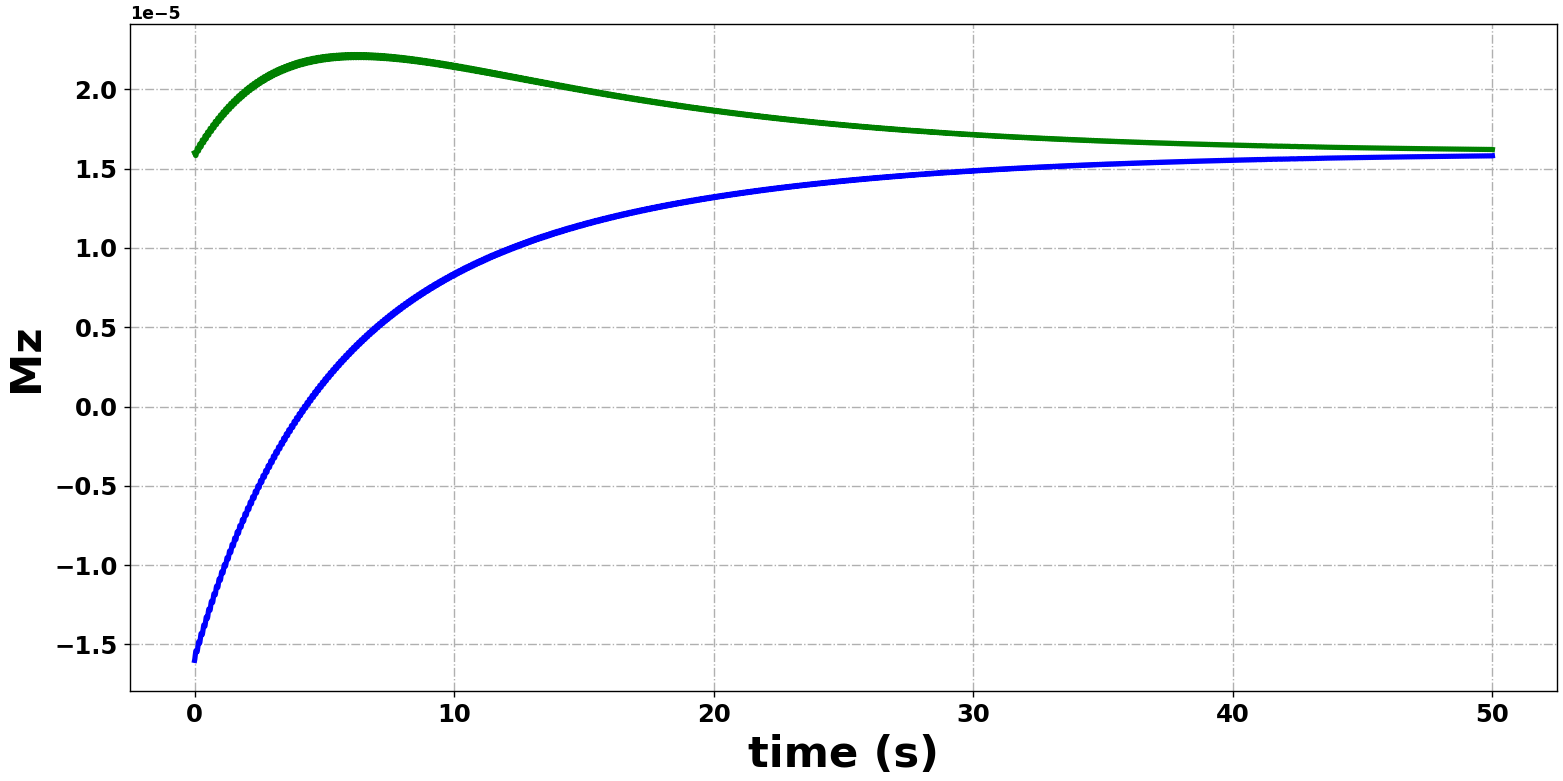

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [76]:
System.PlottingMulti(1,[t,t],[signal_Z1,signal_Z2],"time (s)","Mz",["green","blue"])

## Relaxation in Liouville Space

In [77]:
R = None 
Rprocess = "Auto-correlated Dipolar Homonuclear" 
tau = [10.0e-12]
bIS = [30.0e3]
System.Relaxation_Parameters(LarmorF, OmegaRF, tau, bIS)
R_L = System.Relaxation_L(Rprocess,R,Sx,Sy,Sz,Sp,Sm)

## Relaxation Rate Spin 1

In [78]:
R1_rate = System.RelaxationRate_L(Sz[0],Sz[0],R_L)
Rcross_rate = System.RelaxationRate_L(Sz[1],Sz[0],R_L)
Longit_relaxa = R1_rate + Rcross_rate
R2_rate = System.RelaxationRate_L(Sp[0],Sp[0],R_L)

print("T1 = %.5f and T2 = %.5f" % ((1.0/R1_rate).real, (1.0/R2_rate).real))
print("R1 = %.5f and R2 = %.5f" % ((R1_rate).real, (R2_rate).real))
print("Cross Relaxation rate = %.5f and time = %.5f" % (Rcross_rate.real, 1.0/Rcross_rate.real))
print("Longitudinal Relaxation rate = %.5f and time = %.5f" % (Longit_relaxa.real, 1.0/Longit_relaxa.real))

T1 = 5.63856 and T2 = 5.63482
R1 = 0.17735 and R2 = 0.17747
Cross Relaxation rate = 0.08856 and time = 11.29210
Longitudinal Relaxation rate = 0.26591 and time = 3.76070


## Relaxation Rate Spin 2

In [79]:
R1_rate = System.RelaxationRate_L(Sz[1],Sz[1],R_L)
Rcross_rate = System.RelaxationRate_L(Sz[0],Sz[1],R_L)
Longit_relaxa = R1_rate + Rcross_rate
R2_rate = System.RelaxationRate_L(Sp[1],Sp[1],R_L)

print("T1 = %.5f and T2 = %.5f" % ((1.0/R1_rate).real, (1.0/R2_rate).real))
print("R1 = %.5f and R2 = %.5f" % ((R1_rate).real, (R2_rate).real))
print("Cross Relaxation rate = %.5f and time = %.5f" % (Rcross_rate.real, 1.0/Rcross_rate.real))
print("Longitudinal Relaxation rate = %.5f and time = %.5f" % (Longit_relaxa.real, 1.0/Longit_relaxa.real))

T1 = 5.63856 and T2 = 5.63482
R1 = 0.17735 and R2 = 0.17747
Cross Relaxation rate = 0.08856 and time = 11.29210
Longitudinal Relaxation rate = 0.26591 and time = 3.76070


## Matrix Representation of Relaxation Superoperator in Liouville Space (Zeeman basis)

<IPython.core.display.Javascript object>


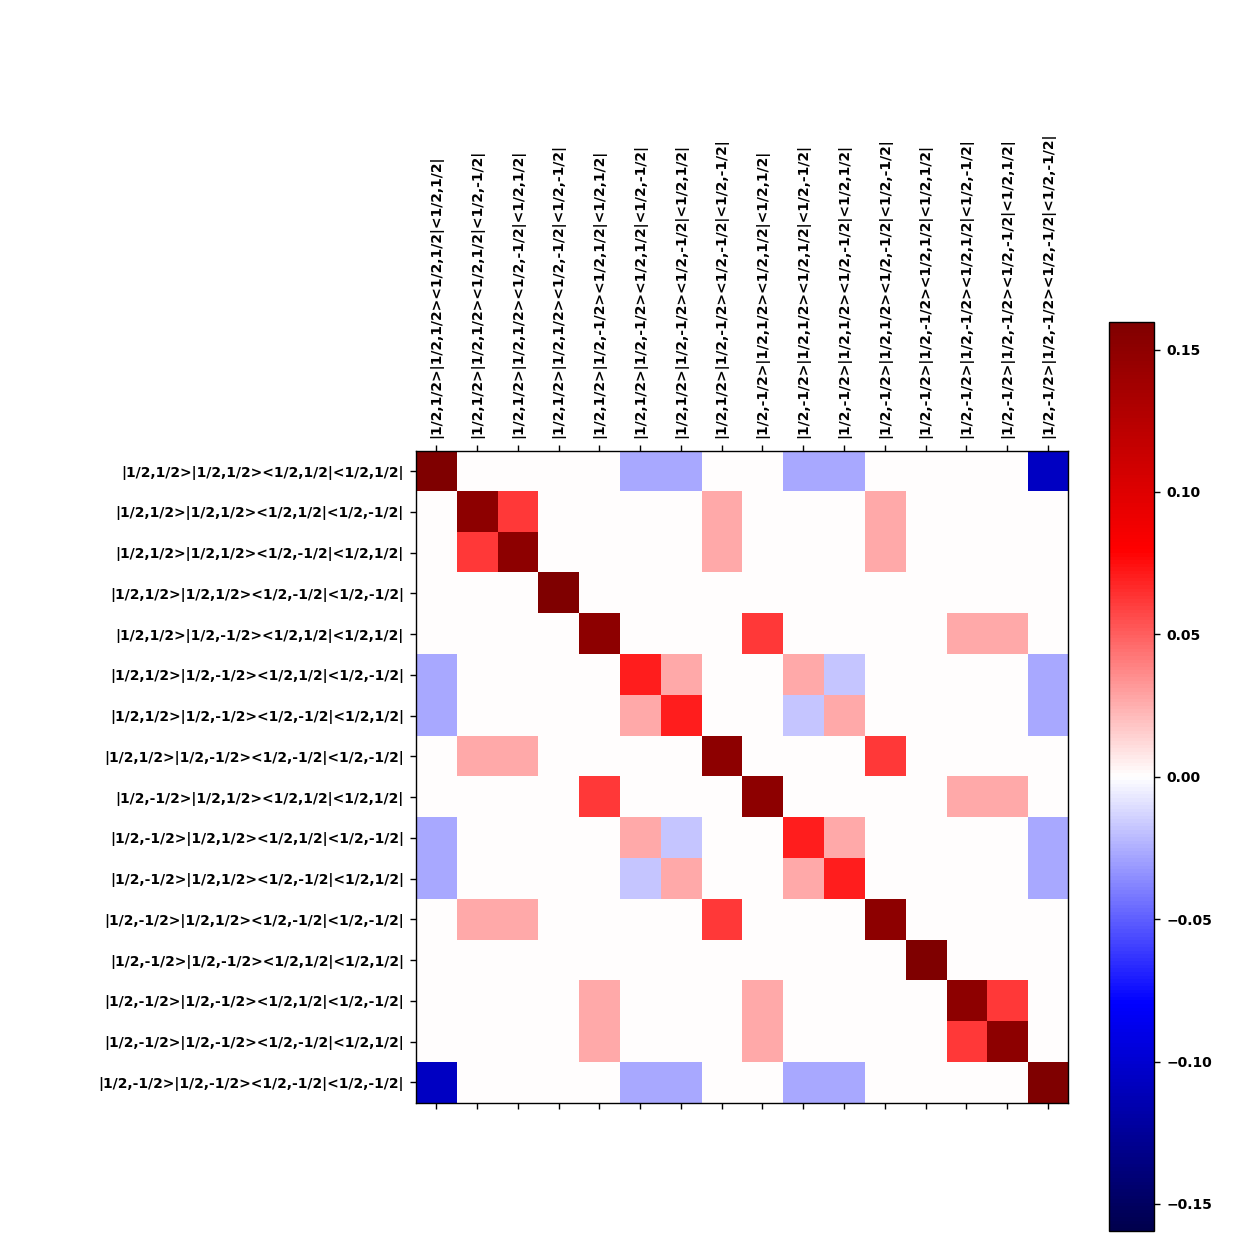

In [80]:
System.MatrixPlot(2,R_L.real,dic_Zeeman,dic_Zeeman)

## Converting  Relaxation Superoperator in Liouville Space from Zeeman to PMZ basis

In [81]:
R_L_PMZ = System.Operator_BasisChange(R_L.real,U_Z_PMZ).real

## Matrix Representation of Relaxation Superoperator in Liouville Space (PMZ basis)

<IPython.core.display.Javascript object>


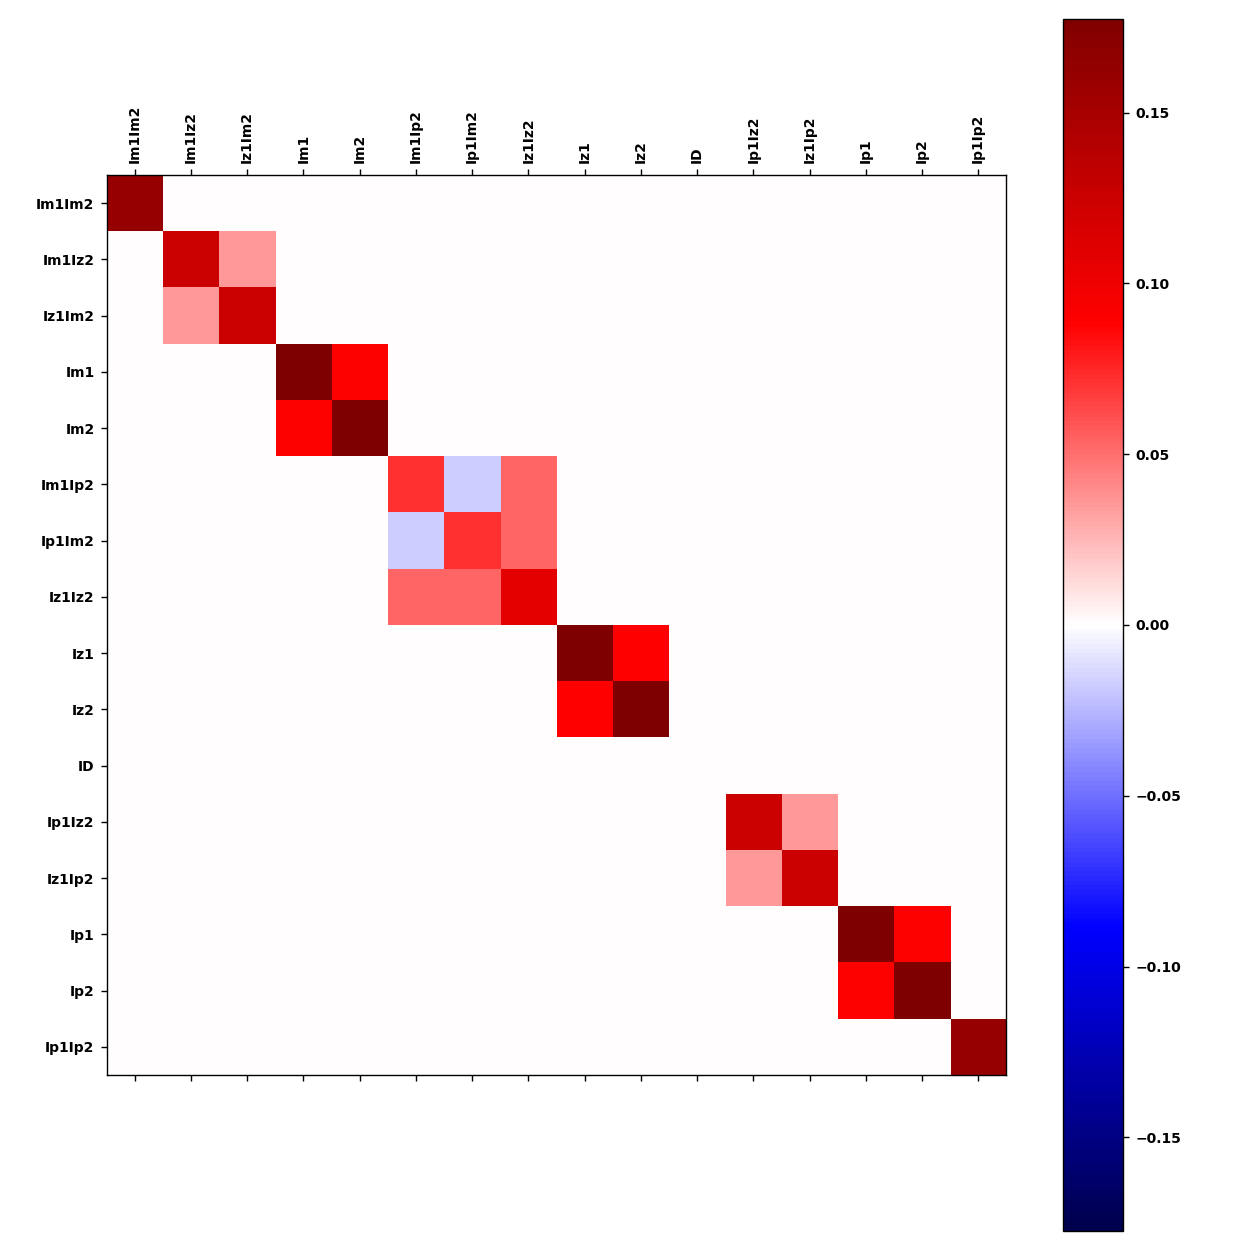

In [82]:
System.MatrixPlot(3,R_L_PMZ,dic_PMZ,dic_PMZ)

## Evolution of Density Matrix Liouville Space

In [83]:
method = "ODE Solver"
System.ODE_Method('DOP853')

start_time = time.time()
t, rho_t = System.Evolution_L(rhoeq_L,rho_L,Sx,Sy,Hz_L,R_L,dt,Npoints,method)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

(16, 500000)
Total time = 3.3995201587677 seconds 


## Expectation value (Liouville Space)

In [84]:
LEXP_Z1 = System.Detection_L(det_Z1)
LEXP_Z2 = System.Detection_L(det_Z2)

In [85]:
t, MZ_1 = System.Expectation_L(rho_t,LEXP_Z1,dt,Npoints)
t, MZ_2 = System.Expectation_L(rho_t,LEXP_Z2,dt,Npoints)

<IPython.core.display.Javascript object>


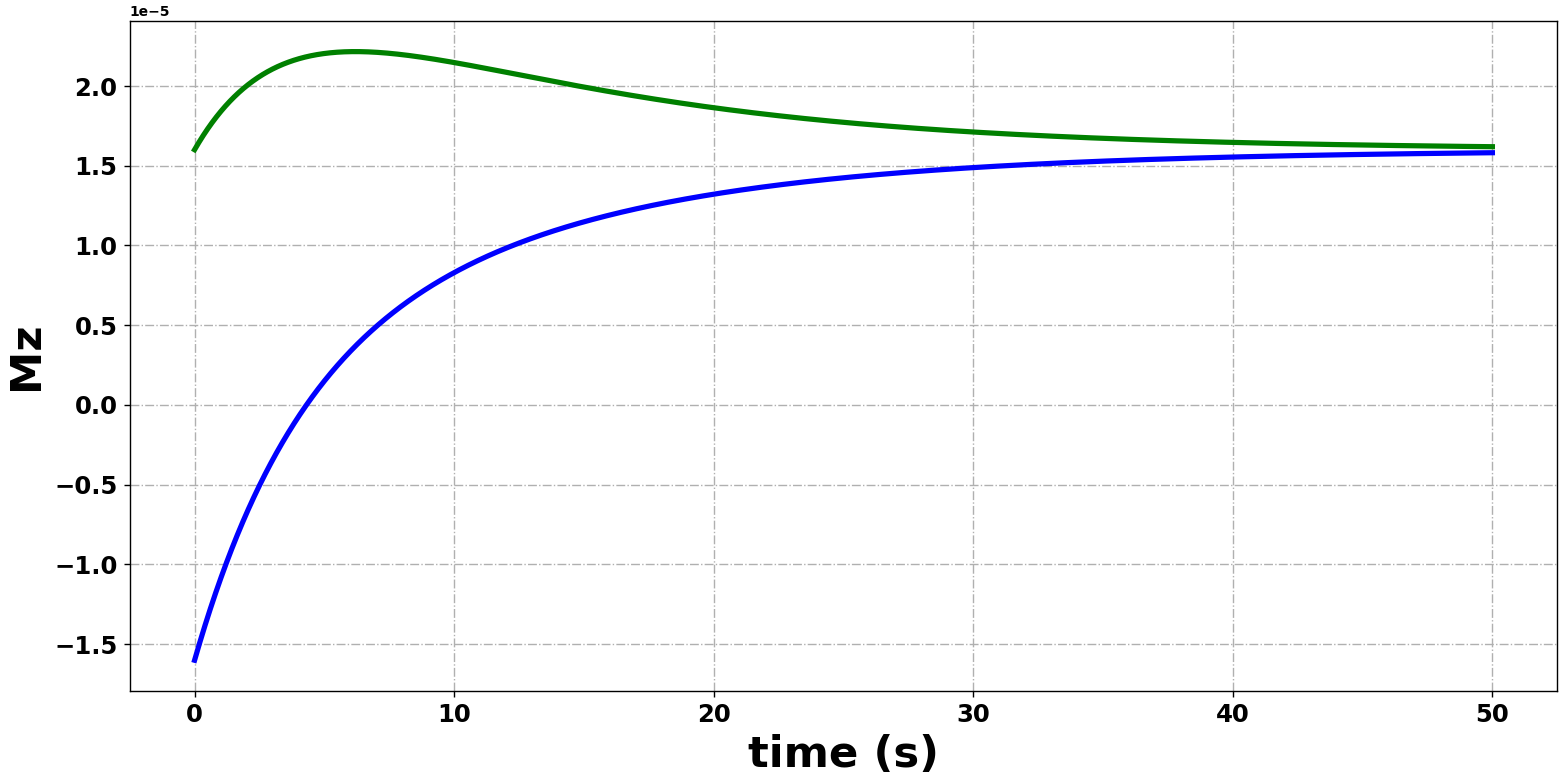

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [86]:
System.PlottingMulti(4,[t,t],[MZ_1,MZ_2],"time (s)","Mz",["green","blue"])

## Remarks
If you see something is wrong, please write to me.

## Any suggestion? write to me
vineethfrancis.physics@gmail.com